<a href="https://colab.research.google.com/github/chandrusuresh/ReinforcementLearning/blob/master/Ch6-TD_Learning/TD_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution to Exercise 6.1


## Monte-Carlo Error

This is the error in the estimate at each episode when the values are updated at the end of the episode after the reward is known.

The Monte-Carlo Error is given by $G_t - V(S_t)$ which simplifies to:
$$ \begin{align*} G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t)\\
&= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) -  \gamma V(S_{t+1}) \end{align*}$$

Given, $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$

$$ \begin{align*} G_t - V(S_t) &= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\ 
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \ldots + \gamma^{T-t} (G_T - V(S_T)) \end{align*}$$

Since $G_T = V(S_T)$, we have the final simplified term for MC error as:

$$ G_t - V(S_t) = \sum_{k=t}^{T} \gamma^{k-t} \delta_k $$

## Bootstrap Error
This is the error in the estimate at each episode when the values are updated at each step of the episode before the (final/terminal) reward is known.

The update at time $t$ for a $TD(0)$ update is given as:
$ V_{t}(S_t) = V_{t-1}(S_t) + \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t))$

The Bootstrap Error is given by $G_t - V(S_t)$ which simplifies to:
$$ \begin{align*} G_{t} - V_{t}(S_t) &= R_{t+1} + \gamma G_{t+1} - V_t(S_t)\\
&= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t) - \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t)) \\
&= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t) - \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t)) + \gamma V_{t-1}(S_{t+1}) -  \gamma V_{t-1}(S_{t+1}) \\
&= (1-\alpha)R_{t+1} - (1-\alpha)V_{t-1}(S_t) + \gamma (G_{t+1} - V_{t-1}(S_{t+1})) + (1-\alpha) \gamma V_{t-1}(S_{t+1})  + \gamma V_{t}(S_{t+1}) -  \gamma V_{t}(S_{t+1})\\
&= (1-\alpha)\delta_t + \gamma (G_{t+1} - V_{t}(S_{t+1})) + \gamma (V_{t}(S_{t+1}) - V_{t-1}(S_{t+1}))\\ 
&= (1-\alpha)\delta_t + \gamma ((1-\alpha)\delta_{t+1} + \gamma (G_{t+2} - V_{t}(S_{t+2})) + \gamma \alpha \delta_{t+2}) + \gamma \alpha \delta_{t+1}\\
&= (1-\alpha) \delta_t + \gamma \delta_{t+1} + \ldots + \gamma^{T-t} (G_T - V(S_T))\\
&= (1-\alpha) \delta_t + \sum_{k=t+1}^{T} \gamma^{k-t} \delta_k \\
&= \sum_{k=t}^{T} \gamma^{k-t} \delta_k - \alpha \delta_t \end{align*}$$


# Solution to Exercice 7.1

## $n$-step TD Bootstrap Error

The above 2 derivations show the expression for the bootstrapping error for MonteCarlo and $1$-step TD methods. The following derivation is a more general derivation for the $n$-step TD Bootstrap error with the $1$-step method ($n=0$) & the Monte-Carlo method ($n=\infty$) in opposite extremes.

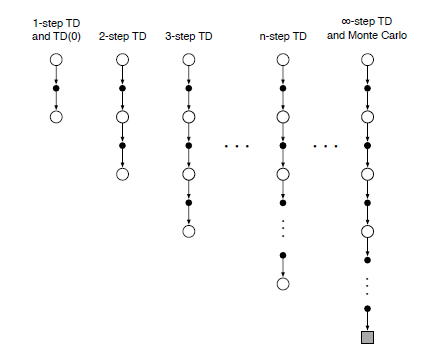


This is the error in the estimate at each episode when the values are updated at each step of the episode before the (final/terminal) reward is known.

The update at time $t$ for an $n$-step update is given by:
$$ V_{t}(S_t) = V_{t-1}(S_t) + \alpha \left(\sum_{k=t+1}^{t+n} R_{k} + \gamma V_{t+n-1}(S_{t+n}) - V_{t-1}(S_t) \right)$$

The Bootstrap Error at termination is given by:
$$ G_{T} - V_{T}(S_T) = 0 $$

The Bootstrap Error at $1$-step before termination is given by:
$$ \begin{align} G_{T-1} - V_{T-1}(S_{T-1}) &= R_T - V_{T-2}(S_{T-1}) - \alpha \left(R_T + \gamma V_{\min(T,T+n-2)}(S_{\min(T,T+n-1)}) - V_{T-2}(S_{T-1}) \right) \\ 
 &= (1-\alpha) \left(R_T + V_{T-1}(S_{T}) - V_{T-2}(S_{T-1}) \right) \\ 
 &= (1-\alpha) \delta_{T-1} \end{align} $$

The Bootstrap Error at $2$-steps before termination is given by:
$$ \begin{align} G_{T-2} - V_{T-2}(S_{T-2}) &= \sum_{k=T-1}^{T} \gamma^{k-T+1} R_{k} - V_{T-3}(S_{T-2}) - \alpha \left(\sum_{k=T-1}^{T} \gamma^{k-T+1}R_{k} + \gamma V_{\min(T,T+n-3)}(S_{\min(T,T+n-2)}) - V_{T-3}(S_{T-2}) \right) \\ 
&= (1-\alpha) \left(\sum_{k=T-1}^{T} \gamma^{k-T+1}R_{k} - V_{T-3}(S_{T-2}) \right) -\alpha \gamma V_{\min(T,T+n-3)}(S_{\min(T,T+n-2)}) \\
&= (1-\alpha) \left(\sum_{k=T-1}^{T} \gamma^{k-T+1}R_{k} - V_{T-3}(S_{T-2}) \right) -\alpha \gamma \left (V_{T+n-3}(S_{T+n-2}) + V_{T+n-2}(S_{T+n-2}) - V_{\min(T,T+n-2)}(S_{T+n-2})\right) \\ 
&= (1-\alpha) \left(\sum_{k=T-1}^{T} \gamma^{k-T+1}R_{k} - V_{T-3}(S_{T-2}) \right) + \alpha \gamma \delta_{t+n-3}(t+n-2) - \alpha \gamma V_{T+n-2}(S_{T+n-2}) \end{align} $$

The Bootstrap Error is given by $G_t - V(S_t)$ is given by:
$$ \begin{align} G_t - V_t(S_t) &= (1-\alpha) \left( \sum_{k=t+1}^{T} \gamma^{k-t-1}R_{k} - V_{t-1}(S_t) \right) - \alpha \gamma V_{\min(T,t+n-1)}(S_{\min(T,t+n)}) \end{align}$$


The Bootstrap Error is given by $G_t - V(S_t)$ is given by:
$$ \begin{align} G_t - V_t(S_t) &= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t)-\alpha \left (\sum_{k=t+1}^{t+n} \gamma^{k-t-1} R_k + \gamma V_{t+n-1}(S_{t+n}) - V_{t-1}(S_t) \right) \\ 
&= (1-\alpha) \left(\sum_{k=t+1}^{t+n} \gamma^{k-t-1} R_k - V_{t-1}(S_t) \right) + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \alpha \gamma V_{t+n-1}(S_{t+n}) \right) + \gamma V_{t+n-1}(S_{t+n}) - \gamma V_{t+n-1}(S_{t+n}) \\ 
&= (1-\alpha) \delta_t + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \gamma V_{t+n-1}(S_{t+n}) \right) \\ 
&= (1-\alpha) \delta_t + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \gamma V_{t+n}(S_{t+n})\right) + \gamma \delta_{t+n} \\ 
&= (1-\alpha) \delta_t + (\gamma^{n-1}-1) \sum_{k=t+n+1}^{T} \gamma^{k-t-n-1} R_k + \gamma \left(G_{t+n} - V_{t+n}(S_{t+n})\right) + \alpha \gamma \delta_{t+n} \end{align}$$